In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import sklearn.ensemble as se #隨機森林
import sklearn.tree as st     # 決策樹
from sklearn.metrics import accuracy_score
import sklearn.preprocessing as sp
import sklearn.model_selection as ms #模型選擇(交叉驗證)
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False
sns.set(style="darkgrid")# 圖背景
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft YaHei','Droid Sans Fallback']})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
#畫常態分佈，H0:變項之樣本群為常態分佈
def dist(data, title):
    x = data.skew()
    y = data.kurt()
    sns.distplot(data, fit=stats.norm)
    plt.title('%s distribution skewness=%.2f, kurtosis=%.2f'%(title,x,y))

In [3]:
# 類別型特徵生存死亡圖
def f_plot(feature):
    print(data[[feature, 'Survived']].groupby(feature, as_index=False).mean().sort_values(by='Survived', ascending=False))
    sns.countplot(x=feature, hue='Survived', data=train)
    
    plt.title('Count of Survived in {}'.format(feature), size=15)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Passenger count', fontsize=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=13)
    plt.grid(linestyle=':')
    plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
    plt.tight_layout()
    plt.show()

In [4]:
#獨熱編碼
def onehot(feature, data):
    encoded_features=[]
    encoded_fe = OneHotEncoder().fit_transform(data[feature].values.reshape(-1, 1)).toarray()
    n = data[feature].nunique()
    cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
    encoded_data = pd.DataFrame(encoded_fe, columns=cols)
    encoded_data.index = data.index
    encoded_features.append(encoded_data)
    return encoded_features   

# 數據總覽

In [5]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
data = pd.concat([train, test], sort=True).reset_index(drop=True)

PassengerId 乘客編號  、  Survived 是否倖存、Pclass 船票等級、Name 乘客姓名、Sex 乘客性別、Age 年齡、SibSp 兄弟姊妹+配偶、Parch 父母與小孩、Ticket 船票號碼、Fare 船票價格、Cabin 船艙、Embarked 登入港口

	sibsp        : of siblings / spouses aboard the Titanic
    parch        : of parents / children aboard the Titanic
    Survival 	 : 0 = No, 1 = Yes
    Ticket class : 1 = 1st, 2 = 2nd, 3 = 3rd
    Port of Embarkation : C = Cherbourg, Q = Queenstown, S = Southampton

In [6]:
print(train.isnull().sum(),train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 Non

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(test.isnull().sum(), test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 None


In [9]:
data.isnull().sum(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


(Age             263
 Cabin          1014
 Embarked          2
 Fare              1
 Name              0
 Parch             0
 PassengerId       0
 Pclass            0
 Sex               0
 SibSp             0
 Survived        418
 Ticket            0
 dtype: int64,
 None)

In [10]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


1.train 損失值 : Age、Cabin、Embarked。

2.test  損失值 : Age、Cabin、Fare。

# 探索式分析 EDA

## 描述性統計

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


訓練和測試樣本每個欄位的形狀類似，Age可能符合常態分佈，Age、SibSp、Parch、Fare均有極端值。

## 相關係數

In [13]:
data.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,-0.150917,0.028814,-0.408106,-0.243699,-0.077221
Fare,0.178740,1.000000,0.221539,0.031428,-0.558629,0.160238,0.257307
Parch,-0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.408106,-0.558629,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.243699,0.160238,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.077221,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


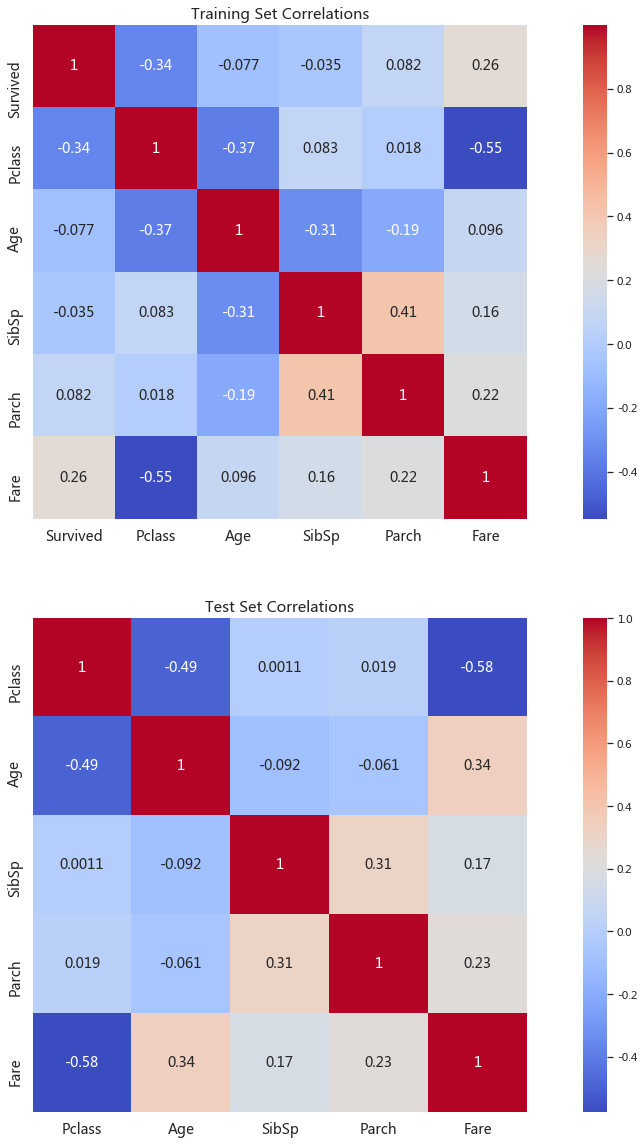

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))

sns.heatmap(train.drop(['PassengerId'], axis=1).corr(), ax=axs[0], 
annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
sns.heatmap(test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], 
annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

train 相關矩陣:
    1. Survived -> Pclass、Fare 相關性較強
    2. Pclass -> Age、Fare 相關性較強
    3. Age -> Pclass、SibSp、Parch 相關性較強
    4. SibSp -> Parch、Age 相關性較強
    5. Fare -> Pclass 相關性較強
test 相關矩陣:
    1. Pclass -> Age、Fare 相關性較強
    2. Age -> Pclass、Fare 相關性較強
    3. SibSp -> Parch 相關性較強
    4. Parch -> SibSp 相關性較強

## 總生存率與死亡率

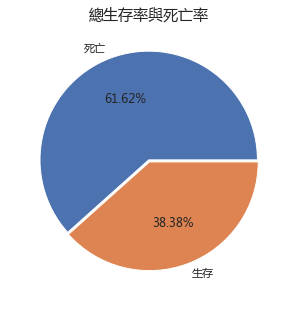

In [15]:
surviver_count = data["Survived"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(surviver_count ,[0.01,0.01],["死亡","生存"],autopct='%1.2f%%')
plt.title("總生存率與死亡率",fontsize = 15)
plt.show()

### 總死亡 : 61.62%，總生存 : 38.38%。

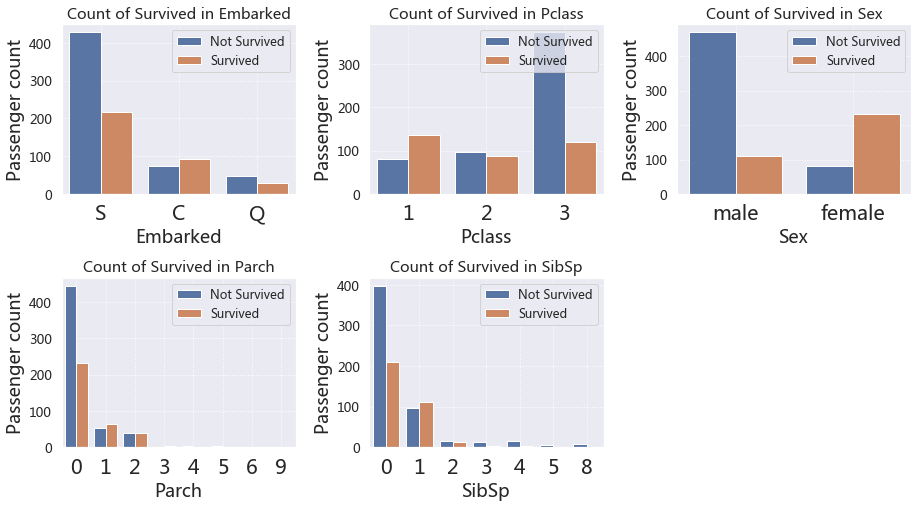

In [16]:
# 類別型特徵生存死亡圖
plt.figure(figsize=(13,10))
featureList = ["Embarked","Pclass","Sex","Parch","SibSp"]
subpltNum = 331
for feature in featureList:
    plt.subplot(subpltNum)
    subpltNum+=1    
#     print(data[[feature, 'Survived']].groupby(feature, as_index=False).mean().sort_values(by='Survived', ascending=False))
    sns.countplot(x=feature, hue='Survived', data=data)
    
    plt.title('Count of Survived in {}'.format(feature), size=15)
    plt.xlabel(feature, fontsize=18)
    plt.ylabel('Passenger count', fontsize=18)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=13)
    plt.grid(linestyle=':')
    plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
    plt.tight_layout()

##### 1. Embarked港口: 從s港口登陸的人生存率最低，c港口生存率遠高於其他港口上船的人。 
##### 2. Pclass 艙等: 一等艙為最高等艙，生存率最高，越低等的艙等生存率有下降的趨勢。
##### 3.Sex 性別 1:male, 0:female :女性生存率遠大於男性，可能和當時船長宣布婦女兒童優先上救生艇有關。
##### 4.Parch 父母與小孩:同家族的父母和小孩的個數，獨自一人組存活率小於１～３人的群組，大於３個人的群組生存率反而更低，推測可能原因為群組會聽從船長指示優先讓媽媽和小孩離開，剩餘人員等待救援。
##### 5.SibSp 兄弟姊妹+配偶:兄弟姊妹和配偶的數目，獨自一人的存活率小於１～２個人的群組，大於３個人的群組生存率很低。
##### 6.根據Parch、SibSp，推斷有親屬的人生存率較高，但親屬3人以上生存率降低。

## Fare 票價 

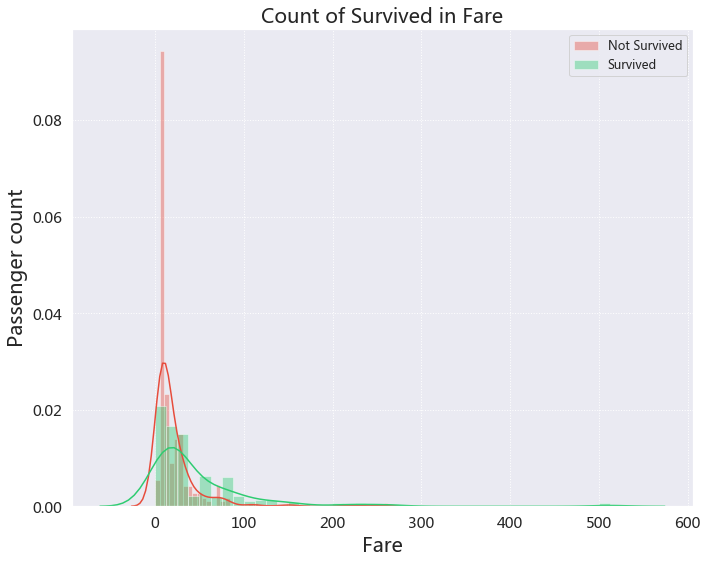

In [17]:
survived_sex = train[train['Survived']==1]['Fare'].dropna()
dead_sex = train[train['Survived']==0]['Fare'].dropna()

plt.figure(figsize=(10,8))
sns.distplot(dead_sex, label='Not Survived', hist=True, color='#e74c3c')
sns.distplot(survived_sex, label='Survived', hist=True, color='#2ecc71')
    
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.title('Count of Survived in Fare', size=20)
plt.grid(linestyle=':')
plt.xlabel('Fare', fontsize=20)
plt.ylabel('Passenger count', fontsize=20)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.legend(prop={'size':12})


### Fare票價:票價越高，生存率有越高的趨勢，票價越高可能代表艙位等級越高，艙等可能也會有此趨勢。

p-value: 0.0


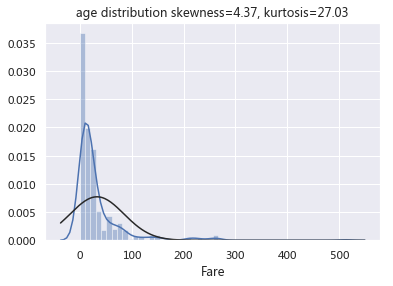

In [18]:
dist(data.loc[data['Fare'].notnull(),'Fare'], 'age')

p = stats.shapiro(data['Fare'].dropna())[1]
print('p-value:',p)

### 結果: p值 < 0.05， 資料不符合常態分佈。

## Age 年齡

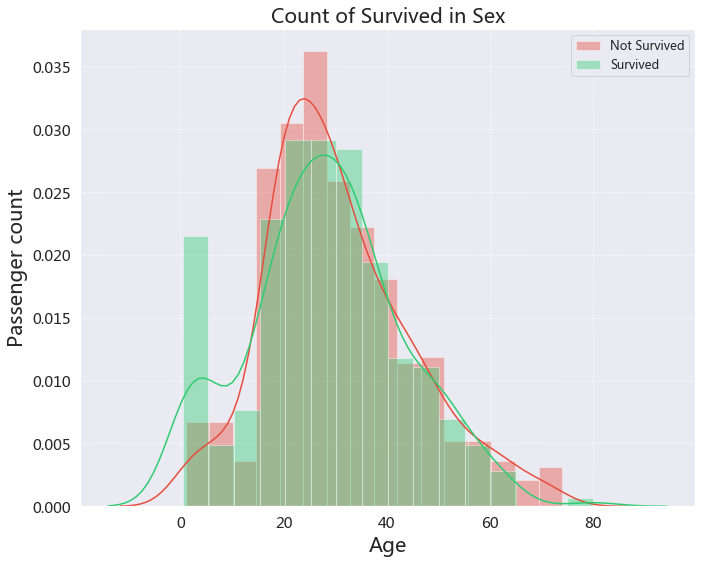

In [19]:
survived_sex = train[train['Survived']==1]['Age'].dropna()
dead_sex = train[train['Survived']==0]['Age'].dropna()

plt.figure(figsize=(10,8))
sns.distplot(dead_sex, label='Not Survived', hist=True, color='#e74c3c')
sns.distplot(survived_sex, label='Survived', hist=True, color='#2ecc71')
    
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(2))
plt.title('Count of Survived in Sex', size=20)
plt.grid(linestyle=':')
plt.xlabel('Age', fontsize=20)
plt.ylabel('Passenger count', fontsize=20)
plt.tick_params(labelsize=15)
plt.tight_layout()
plt.legend(prop={'size':12})


### 年齡部分，0-15歲小孩存活率較高，5歲以下越明顯。

p-value: 5.74782790807582e-11


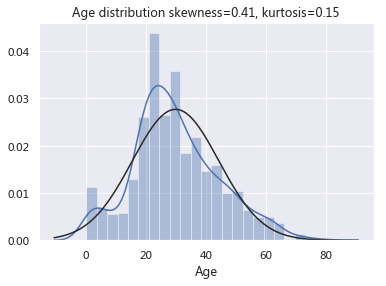

In [20]:
dist(data.loc[data['Age'].notnull(),'Age'], 'Age')
p = stats.shapiro(data['Age'].dropna())[1]
print('p-value:',p)

### 結果: p值 < 0.05 ，資料不符合常態分佈。

# 特徵工程

## Embarked港口

In [21]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [22]:
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Pclass 艙等

### 做卡方檢定，以95%信賴區間假設檢定，假設H0 不同艙等對於是否生存沒有顯著差異。

In [23]:
p1_no_survived = data.loc[(data["Pclass"]==1)&(data["Survived"]==0),"Survived"].dropna().count()
p1_survived = data.loc[(data["Pclass"]==1)&(data["Survived"]==1),"Survived"].dropna().count()
p2_no_survived = data.loc[(data["Pclass"]==2)&(data["Survived"]==0),"Survived"].dropna().count()
p2_survived = data.loc[(data["Pclass"]==2)&(data["Survived"]==1),"Survived"].dropna().count()
p3_no_survived = data.loc[(data["Pclass"]==3)&(data["Survived"]==0),"Survived"].dropna().count()
p3_survived = data.loc[(data["Pclass"]==3)&(data["Survived"]==1),"Survived"].dropna().count()

pclass_no_survived = [p1_no_survived,p2_no_survived,p3_no_survived]
pclass_survived = [p1_survived,p2_survived,p3_survived]

pclass_data =  np.array([pclass_no_survived, pclass_survived ])
p_value = stats.chi2_contingency(pclass_data)[1]
print("p-value:",p_value)

p-value: 4.549251711298793e-23


### 結果: p值 < 0.05，拒絕H0，不同的艙等對於是否生存有顯著差異，艙等列為重要特徵。

## Sex 性別 1:male, 0:female

In [24]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### 做卡方檢定，以95%信賴區間假設檢定，假設H0 不同性別對於是否生存沒有顯著差異。

In [25]:
female_no_survived = data.loc[(data["Sex"]=="female")&(data["Survived"]==0),"Survived"].dropna().count()
female_survived = data.loc[(data["Sex"]=="female")&(data["Survived"]==1),"Survived"].dropna().count()
male_no_survived = data.loc[(data["Sex"]=="male")&(data["Survived"]==0),"Survived"].dropna().count()
male_survived = data.loc[(data["Sex"]=="male")&(data["Survived"]==1),"Survived"].dropna().count()

sex_no_survived = [female_no_survived,male_no_survived]
sex_survived = [female_survived,male_survived]

survived_data =  np.array([sex_no_survived, sex_survived])
p_value = stats.chi2_contingency(survived_data)[1]
print("p_value:",p_value)

p_value: 1.1973570627755645e-58


### 結果: p值 < 0.05 ，拒絕H0，不同性別對於是否生存有顯著差異，性別列為重要特徵。

In [26]:
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450


## Age 年齡

In [27]:
data[data['Age'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,1,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877
17,NaN,NaN,2,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,1.0,244373
19,NaN,NaN,0,7.2250,"Masselmani, Mrs. Fatima",0,20,3,0,0,1.0,2649
26,NaN,NaN,0,7.2250,"Emir, Mr. Farred Chehab",0,27,3,1,0,0.0,2631
28,NaN,NaN,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,0,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,NaN,1,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,0,0,NaN,334915
1301,NaN,NaN,1,7.7500,"Naughton, Miss. Hannah",0,1302,3,0,0,NaN,365237
1304,NaN,NaN,2,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236
1307,NaN,NaN,2,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309


In [28]:
data.corr()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
Age,1.000000,-0.080195,0.178740,-0.150917,0.028814,-0.408106,0.063645,-0.243699,-0.077221
Embarked,-0.080195,1.000000,-0.238005,0.044772,-0.051977,0.185479,0.097960,0.065567,-0.167675
Fare,0.178740,-0.238005,1.000000,0.221539,0.031428,-0.558629,-0.185523,0.160238,0.257307
Parch,-0.150917,0.044772,0.221539,1.000000,0.008942,0.018322,-0.213125,0.373587,0.081629
PassengerId,0.028814,-0.051977,0.031428,0.008942,1.000000,-0.038354,0.013406,-0.055224,-0.005007
Pclass,-0.408106,0.185479,-0.558629,0.018322,-0.038354,1.000000,0.124617,0.060832,-0.338481
Sex,0.063645,0.097960,-0.185523,-0.213125,0.013406,0.124617,1.000000,-0.109609,-0.543351
SibSp,-0.243699,0.065567,0.160238,0.373587,-0.055224,0.060832,-0.109609,1.000000,-0.035322
Survived,-0.077221,-0.167675,0.257307,0.081629,-0.005007,-0.338481,-0.543351,-0.035322,1.000000


In [29]:
data_corr = data.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
data_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation Coefficient'}, inplace=True)

In [30]:
data_corr[data_corr['Feature_1'] == 'Age']

,Feature_1,Feature_2,Correlation Coefficient
8,Age,Age,1.000000
13,Age,Pclass,0.408106
21,Age,SibSp,0.243699
33,Age,Fare,0.178740
40,Age,Parch,0.150917
49,Age,Embarked,0.080195
51,Age,Survived,0.077221
55,Age,Sex,0.063645
71,Age,PassengerId,0.028814


### 年齡和艙等有中度相關，推測年齡越大經濟能力越好，艙等越高。

### 做F檢定，以95%信賴區間做假設檢定，H0 假設 不同艙等對年齡沒有顯著差異

In [31]:
pclass_1 =  data.loc[data['Pclass']==1,['Age']].dropna()
pclass_2 =  data.loc[data['Pclass']==2,['Age']].dropna()
pclass_3 =  data.loc[data['Pclass']==3,['Age']].dropna()
p = stats.f_oneway(pclass_1, pclass_2, pclass_3)[1]
print('p_value:',p)

p_value: [1.79670837e-43]


### 結果: p值 < 0.05 ，拒絕H0，不同艙等對年齡有顯著差異，艙等可做年齡填充遺漏值依據。

## 從Name中可以提取出稱謂

In [32]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr


In [33]:
x2 = data.groupby(['Sex','Pclass', 'Title'])['Age']
x2.median()

Sex  Pclass  Title   
0    1       Countess    33.0
             Dona        39.0
             Dr          49.0
             Lady        48.0
             Miss        30.0
             Mlle        24.0
             Mme         24.0
             Mrs         45.0
     2       Miss        20.0
             Mrs         30.5
             Ms          28.0
     3       Miss        18.0
             Mrs         31.0
             Ms           NaN
1    1       Capt        70.0
             Col         54.5
             Don         40.0
             Dr          47.0
             Jonkheer    38.0
             Major       48.5
             Master       6.0
             Mr          41.5
             Sir         49.0
     2       Dr          38.5
             Master       2.0
             Mr          30.0
             Rev         41.5
     3       Master       6.0
             Mr          26.0
Name: Age, dtype: float64

In [34]:
data.loc[((data['Pclass']==3)&(data['Sex']==0)&(data['Title']=='Ms'))]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
979,NaN,NaN,1,7.75,"O'Donoghue, Ms. Bridget",0,980,3,0,0,NaN,364856,Ms


In [35]:
data['Age'] = data.groupby(['Sex','Pclass', 'Title'])['Age'].apply(lambda x:x.fillna(x.median()))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [36]:
ms_median =  data.loc[data['Title']=='Ms']['Age'].median()
data['Age'] = data['Age'].fillna(ms_median)

In [37]:
data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
dtype: int64

In [38]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,26.0,NaN,2,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236,Mr
1305,39.0,C105,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758,Dona
1306,38.5,NaN,2,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262,Mr
1307,26.0,NaN,2,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309,Mr


## 是否為15歲以上的小孩， 0 -> 15歲以下，1->15歲以上。

In [39]:
x =np.array(data['Age']).reshape(-1, 1)
#二值化器
bin = sp.Binarizer(threshold=15)
bin_age = bin.transform(x)
bin_age

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

In [40]:
data['IsChild'] = 0
for index,value in enumerate(bin_age) :
    data['IsChild'][index] = value
data.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild
0,22.0,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1
1,38.0,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1
3,35.0,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1
4,35.0,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1
5,26.0,NaN,1,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,Mr,1
6,54.0,E46,2,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,Mr,1
7,2.0,NaN,2,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,Master,0
8,27.0,NaN,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1.0,347742,Mrs,1
9,14.0,NaN,0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1.0,237736,Mrs,0


## 卡方檢定，以95%信賴區間做假設檢定，H0 是否為15歲以上小孩對是否生存沒有顯著差異。

In [41]:
no_child_no_survived = data.loc[(data["IsChild"]==0)&(data["Survived"]==0),"Survived"].dropna().count()
no_child_survived = data.loc[(data["IsChild"]==0)&(data["Survived"]==1),"Survived"].dropna().count()
child_no_survived = data.loc[(data["IsChild"]==1)&(data["Survived"]==0),"Survived"].dropna().count()
child_survived = data.loc[(data["IsChild"]==1)&(data["Survived"]==1),"Survived"].dropna().count()

child_survived = [child_survived,no_child_survived]
child_no_survived = [child_no_survived,no_child_no_survived]

child_data =  np.array([child_survived,child_no_survived])
p_value = stats.chi2_contingency(child_data)[1]
print("p-value:",p_value)

p-value: 7.190247380510624e-05


### 結果: p值<0.05，拒絕H0，是否為15歲以上小孩對是否生存 有顯著差異。

### 做boxcox ，讓整體更趨近於常態

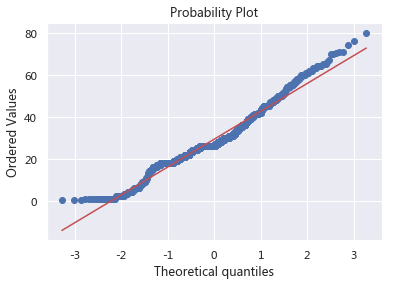

lambda:0.7567810526815595


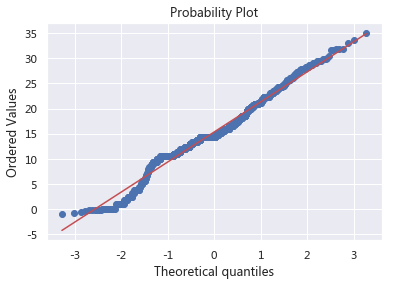

In [42]:
stats.probplot(data['Age'], plot=plt)
plt.show()

x, lambda_box = stats.boxcox(data.loc[:,'Age'])
stats.probplot(x, plot=plt)
print('lambda:{}'. format(lambda_box))
plt.show()

data.loc[:, 'Age'] = x

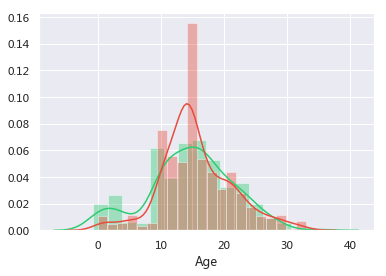

In [43]:
survived_age = data[data['Survived']==1]['Age']
dead_age = data[data['Survived']==0]['Age']
sns.distplot(survived_age, label='Survived', hist=True, color='#2ecc71')
sns.distplot(dead_age, label='Not Survived', hist=True, color='#e74c3c')


## 年齡分組 

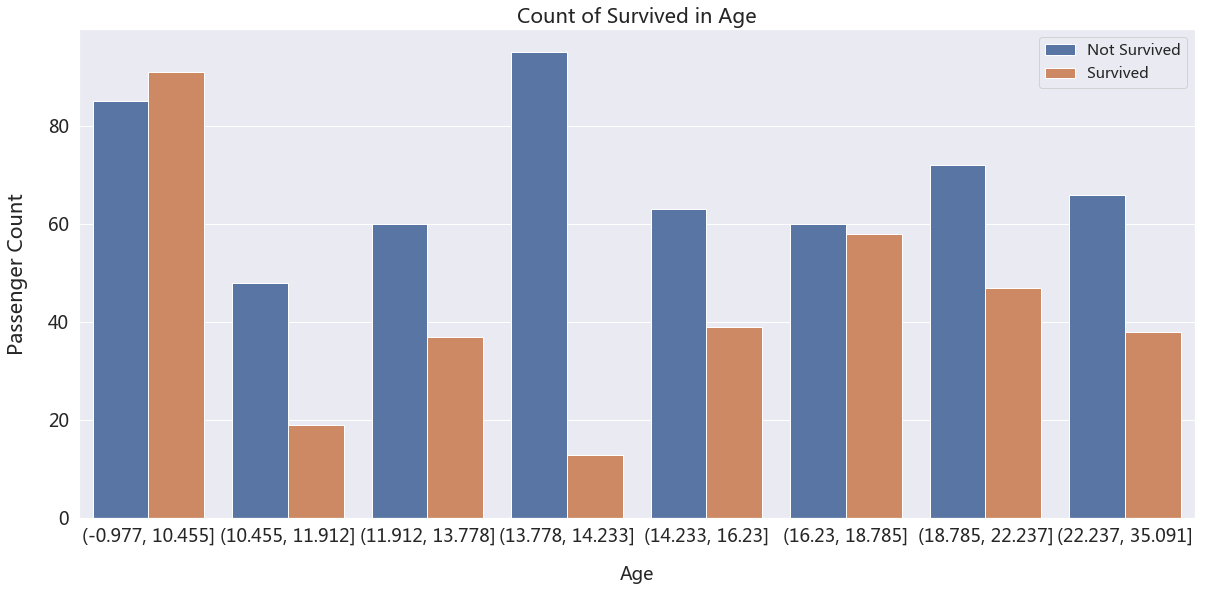

In [44]:
data["Age"] = pd.qcut(data["Age"], 8)

plt.figure(figsize=(20, 9))
sns.countplot(x="Age", hue="Survived", data=data)
plt.title("Count of Survived in Age" ,size=20)
plt.xlabel("Age", size=18, labelpad=20)
plt.ylabel("Passenger Count", size=20, labelpad=20)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.legend(["Not Survived", "Survived"], prop={"size": 15})
plt.show()

### 第一組生存最高，其中(16.23,18.758]相較其他組生存率較高、(13.778,14.233]生存率最低。

In [45]:
data['Age'] = LabelEncoder().fit_transform(data['Age'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild
0,2,NaN,2,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1
1,6,C85,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1
2,3,NaN,2,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1
3,5,C123,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1
4,5,NaN,2,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1


## Fare 票價

In [46]:
data_corr = data.corr().abs().unstack().sort_values(kind='quicksort', ascending=False).reset_index()
data_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation Coefficient'}, inplace=True)

In [47]:
data_corr[data_corr['Feature_1'] == 'Fare']

,Feature_1,Feature_2,Correlation Coefficient
3,Fare,Fare,1.000000
11,Fare,Pclass,0.558629
27,Fare,Survived,0.257307
28,Fare,Embarked,0.238005
31,Fare,Parch,0.221539
37,Fare,Sex,0.185523
41,Fare,Age,0.183741
45,Fare,SibSp,0.160238
83,Fare,PassengerId,0.031428
96,Fare,IsChild,0.001587


### 觀察票價相關性，艙等、登船港口、父母小孩總數相關性較強，以此為基準填充遺漏值。

In [48]:
data.loc[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild
1043,7,NaN,2,NaN,"Storey, Mr. Thomas",0,1044,3,1,0,NaN,3701,Mr,1


In [49]:
median_fare = data.groupby(['Pclass','Embarked','Parch']).Fare.median()[3][0][0]
data['Fare'] = data['Fare'].fillna(median_fare)
data.isnull().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
Title             0
IsChild           0
dtype: int64

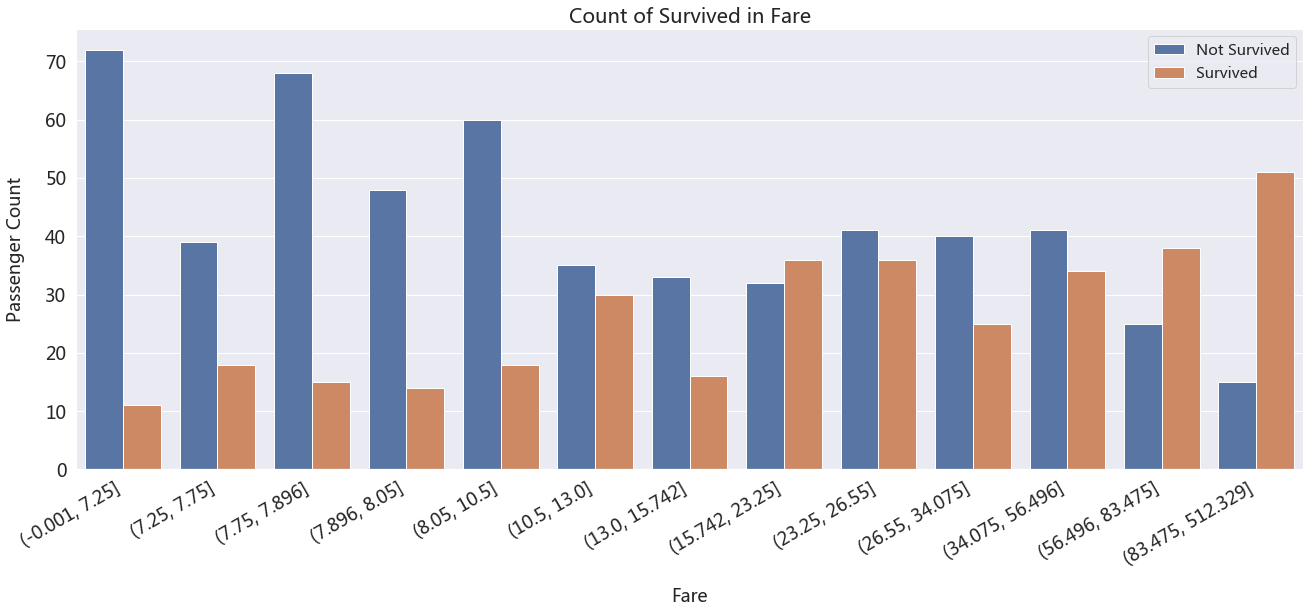

In [50]:
data["Fare"] = pd.qcut(data["Fare"], 13)

plt.figure(figsize=(22, 9))
sns.countplot(x="Fare", hue="Survived", data=data)
plt.title("Count of Survived in Fare" ,size=20)
plt.xlabel("Fare", size=18, labelpad=20)
plt.ylabel("Passenger Count", size=18, labelpad=20)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.legend(["Not Survived", "Survived"], prop={"size": 15})
plt.gcf().autofmt_xdate()
plt.show()

### 票價增高生存率也有增加的趨勢，尤其是最後一組(票價最高)生存率遠高於其他。

In [51]:
data['Fare'] = LabelEncoder().fit_transform(data['Fare'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild
0,2,NaN,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1
1,6,C85,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1
2,3,NaN,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1
3,5,C123,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1
4,5,NaN,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1


# Cabin 船艙

In [52]:
# set(data.loc[:,'Cabin'])

In [53]:
#船艙 字母+數字組成，只留字母
data['Cabin'] = data['Cabin'].fillna('xx')
data.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Title            0
IsChild          0
dtype: int64

In [54]:
#做篩選，填入新定義的艙位名稱
cabinlist = ['A', 'B','C', 'D', 'E', 'F', 'G','E','T']
for cabin in cabinlist:
    mask = data['Cabin'].str.contains(cabin)
    data.loc[mask, 'Cabin'] = cabin 
set(data.loc[:, 'Cabin'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'xx'}

In [55]:
data['Cabin']

0       xx
1        C
2       xx
3        C
4       xx
        ..
1304    xx
1305     C
1306    xx
1307    xx
1308    xx
Name: Cabin, Length: 1309, dtype: object

In [56]:
data.groupby(['Pclass','Cabin'])['Cabin'].count()

Pclass  Cabin
1       A         22
        B         65
        C         94
        D         40
        E         34
        T          1
        xx        67
2       D          6
        E          4
        F         13
        xx       254
3       E          6
        F          5
        G          5
        xx       693
Name: Cabin, dtype: int64

In [57]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild
0,2,xx,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1
1,6,C,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1
2,3,xx,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1
3,5,C,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1
4,5,xx,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1


In [58]:
data['Cabin'] = LabelEncoder().fit_transform(data['Cabin'])
data.loc[:, 'Cabin'].head()

0    8
1    2
2    8
3    2
4    8
Name: Cabin, dtype: int32

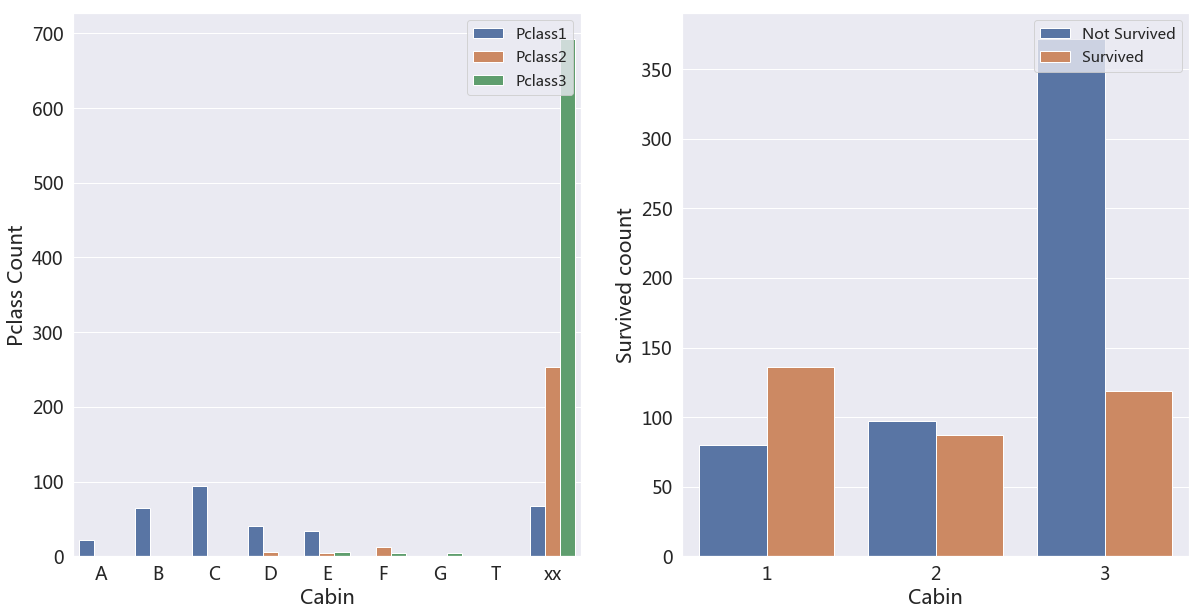

In [59]:
x_name = ['A','B','C', 'D', 'E','F', 'G', 'T', 'xx']
x_index = np.arange(len(x_name))

plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='Cabin', hue='Pclass', data=data)
plt.xlabel('Cabin', fontsize=20)
plt.ylabel('Pclass Count', fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.xticks(x_index, x_name)
plt.legend(['Pclass1', 'Pclass2', 'Pclass3'],loc='upper right',prop={'size':15})

plt.subplot(122)
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.xlabel('Cabin', fontsize=20)
plt.ylabel('Survived coount', fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':15})



### 缺失值大部分都在3等艙，且上面已驗證[艙等與存活率有顯著差異]，從圖表可觀察到越低等的艙存活率越低。

### 用艙等分類，根據船艙位置圖可發現與逃生路徑有關，字母越靠前越靠近輪船上層。
### A,B,C,T 和xx在pclass1最為相似歸類為一類，pclass2歸類一類，pclass3和G歸類一類，共3類。

In [60]:
data['Deck'] = data['Cabin']
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,8
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1,2
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1,8
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1,2
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,8


In [61]:
cabin_name = [0, 1, 2, 3, 4, 5, 6, 7, 8]

for cn in cabin_name:
    mask1 = ((data['Cabin'] ==cn )& (data['Pclass']==1))
    data.loc[mask1,'Deck'] = 'D1'
    mask2 = ((data['Cabin'] ==cn )& (data['Pclass']==2))
    data.loc[mask2,'Deck'] = 'D2'
    mask3= ((data['Cabin'] ==cn )& (data['Pclass']==3))
    data.loc[mask3,'Deck'] = 'D3'
    
data.head(11)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,D3
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1,D1
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1,D3
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1,D1
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,D3
5,3,8,1,4,"Moran, Mr. James",0,6,3,1,0,0.0,330877,Mr,1,D3
6,7,4,2,10,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,Mr,1,D1
7,0,8,2,7,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,Master,0,D3
8,4,8,2,5,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1.0,347742,Mrs,1,D3
9,0,8,0,9,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1.0,237736,Mrs,0,D2


  Deck  Survived
0   D1  0.629630
1   D2  0.472826
2   D3  0.242363


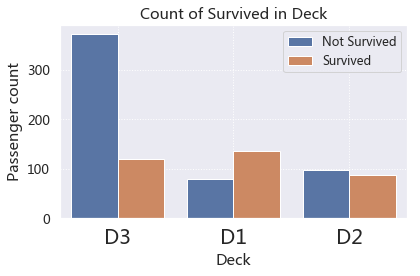

In [62]:
print(data[['Deck', 'Survived']].groupby('Deck', as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Deck', hue='Survived', data=data)
    
plt.title('Count of Survived in Deck', size=15)
plt.xlabel('Deck', fontsize=15)
plt.ylabel('Passenger count', fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=13)
plt.grid(linestyle=':')
plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
plt.tight_layout()
plt.show()

### 做卡方檢定，以95%信賴區間做假設檢定，H0 不同甲板對是否生存沒有顯著差異。

In [63]:
D1_no_survived = data.loc[(data["Deck"]=="D1")&(data["Survived"]==0),"Survived"].dropna().count()
D1_survived = data.loc[(data["Deck"]=="D1")&(data["Survived"]==1),"Survived"].dropna().count()
D2_no_survived = data.loc[(data["Deck"]=="D2")&(data["Survived"]==0),"Survived"].dropna().count()
D2_survived = data.loc[(data["Deck"]=="D2")&(data["Survived"]==1),"Survived"].dropna().count()
D3_no_survived = data.loc[(data["Deck"]=="D3")&(data["Survived"]==0),"Survived"].dropna().count()
D3_survived = data.loc[(data["Deck"]=="D3")&(data["Survived"]==1),"Survived"].dropna().count()

Deck_no_survived = [D1_no_survived,D2_no_survived,D3_no_survived]
Deck_survived = [D1_survived,D2_survived,D3_survived]
Deck_data =  np.array([Deck_no_survived, Deck_survived ])
p_value = stats.chi2_contingency(Deck_data)[1]
print("p-value:",p_value)

p-value: 4.549251711298793e-23


### 結果: p值 < 0.05，拒絕H0，不同甲板對是否生存有顯著差異，列為重要特徵。

## Parch 父母與小孩

### 做卡方，以95%信賴區間做假設檢定，H0 不同父母小孩個數的群組對是否生存沒有顯著差異。

In [64]:
Parch1_no_survived = data.loc[(data["Parch"]==1)&(data["Survived"]==0),"Survived"].dropna().count()
Parch1_survived = data.loc[(data["Parch"]==1)&(data["Survived"]==1),"Survived"].dropna().count()
Parch2_no_survived = data.loc[(data["Parch"]==2)&(data["Survived"]==0),"Survived"].dropna().count()
Parch2_survived = data.loc[(data["Parch"]==2)&(data["Survived"]==1),"Survived"].dropna().count()
Parch3_no_survived = data.loc[(data["Parch"]==3)&(data["Survived"]==0),"Survived"].dropna().count()
Parch3_survived = data.loc[(data["Parch"]==3)&(data["Survived"]==1),"Survived"].dropna().count()
Parch4_no_survived = data.loc[(data["Parch"]==4)&(data["Survived"]==0),"Survived"].dropna().count()
Parch4_survived = data.loc[(data["Parch"]==4)&(data["Survived"]==1),"Survived"].dropna().count()
Parch5_no_survived = data.loc[(data["Parch"]==5)&(data["Survived"]==0),"Survived"].dropna().count()
Parch5_survived = data.loc[(data["Parch"]==5)&(data["Survived"]==1),"Survived"].dropna().count()
Parch6_no_survived = data.loc[(data["Parch"]==6)&(data["Survived"]==0),"Survived"].dropna().count()
Parch6_survived = data.loc[(data["Parch"]==6)&(data["Survived"]==1),"Survived"].dropna().count()

Parch_no_survived = [Parch1_no_survived,Parch2_no_survived,Parch3_no_survived,Parch4_no_survived,Parch5_no_survived,Parch6_no_survived]
Parch_survived = [Parch1_survived,Parch2_survived,Parch3_survived,Parch4_survived,Parch5_survived,Parch6_survived]

Parch_data =  np.array([Parch_no_survived, Parch_survived ])
p_value = stats.chi2_contingency(Parch_data)[1]
print("p-value:",p_value)

p-value: 0.15041319161234876


### 結果: p值 >0.05，接受H0，不同父母小孩個數的群組對是否生存 沒有顯著差異。

## SibSp 兄弟姊妹+配偶

### 做卡方，以95%信賴區間做假設檢定，H0 不同兄弟姊妹和配偶個數的群組對是否生存沒有顯著差異。

In [65]:
SibSp1_no_survived = data.loc[(data["SibSp"]==1)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp1_survived = data.loc[(data["SibSp"]==1)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp2_no_survived = data.loc[(data["SibSp"]==2)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp2_survived = data.loc[(data["SibSp"]==2)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp3_no_survived = data.loc[(data["SibSp"]==3)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp3_survived = data.loc[(data["SibSp"]==3)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp4_no_survived = data.loc[(data["SibSp"]==4)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp4_survived = data.loc[(data["SibSp"]==4)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp5_no_survived = data.loc[(data["SibSp"]==5)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp5_survived = data.loc[(data["SibSp"]==5)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp0_no_survived = data.loc[(data["SibSp"]==0)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp0_survived = data.loc[(data["SibSp"]==0)&(data["Survived"]==1),"Survived"].dropna().count()
SibSp8_no_survived = data.loc[(data["SibSp"]==8)&(data["Survived"]==0),"Survived"].dropna().count()
SibSp8_survived = data.loc[(data["SibSp"]==8)&(data["Survived"]==1),"Survived"].dropna().count()


SibSp_no_survived = [SibSp0_no_survived,SibSp1_no_survived,SibSp2_no_survived,SibSp3_no_survived,SibSp4_no_survived,SibSp5_no_survived,SibSp8_no_survived]
SibSp_survived = [SibSp0_survived,SibSp1_survived,SibSp2_survived,SibSp3_survived,SibSp4_survived,SibSp5_survived,SibSp8_survived]

SibSp_data =  np.array([SibSp_no_survived, SibSp_survived ])
p_value = stats.chi2_contingency(SibSp_data)[1]
print("p-value:",p_value)

p-value: 1.5585810465902116e-06


### 結果: p值 <0.05，拒絕H0，不同兄弟姊妹和配偶個數的群組對是否生存有顯著差異。歸類為型一錯誤(提交後，分數下降)

## 增加新欄位:家庭成員 

In [66]:
data['Family'] = data['Parch'] + data['SibSp']
data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck,Family
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,D3,1
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1,D1,1
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1,D3,0
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1,D1,1
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,D3,0
5,3,8,1,4,"Moran, Mr. James",0,6,3,1,0,0.0,330877,Mr,1,D3,0
6,7,4,2,10,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,Mr,1,D1,0
7,0,8,2,7,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,Master,0,D3,4
8,4,8,2,5,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,0,0,1.0,347742,Mrs,1,D3,2
9,0,8,0,9,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,0,1,1.0,237736,Mrs,0,D2,1


   Family  Survived
3       3  0.724138
2       2  0.578431
1       1  0.552795
6       6  0.333333
0       0  0.303538
4       4  0.200000
5       5  0.136364
7       7  0.000000
8      10  0.000000


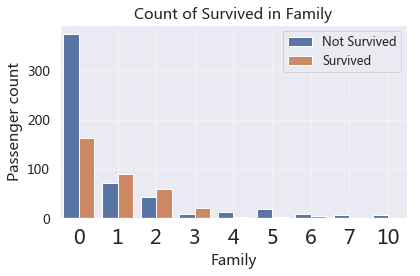

In [67]:
print(data[['Family', 'Survived']].groupby('Family', as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Family', hue='Survived', data=data)
    
plt.title('Count of Survived in Family', size=15)
plt.xlabel('Family', fontsize=15)
plt.ylabel('Passenger count', fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=13)
plt.grid(linestyle=':')
plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
plt.tight_layout()
plt.show()

### 家庭成員介於1-3之間的群組生存率較高，其次為6、獨自一人，4-5生存率倒數第二，7-8生存率為0。

### 家庭型態分組: 獨自一人 -> 0， 小家庭 -> 1-3， 中家庭 ->  4-6， 大家庭 -> 7-10

## 家庭型態　

In [68]:
data['Family_st'] = "獨自一人"
f = data['Family']
for i in range(len(data)):
    if f[i] == 0:
        data.loc[i, 'Family_st'] = "獨自一人"
    elif 0 < f[i] <= 3:
        data.loc[i, 'Family_st'] = "小家庭"
    elif 3 < f[i] <= 6 :
        data.loc[i, 'Family_st'] = "中家庭"
    else:
        data.loc[i, 'Family_st'] = "大家庭"

  Family_st  Survived
2       小家庭  0.578767
3      獨自一人  0.303538
0       中家庭  0.204082
1       大家庭  0.000000


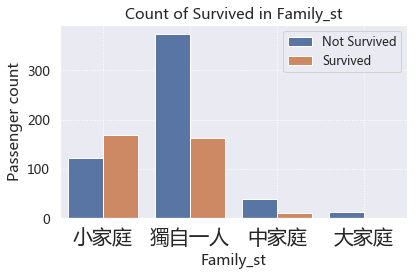

In [69]:
print(data[['Family_st', 'Survived']].groupby('Family_st', as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Family_st', hue='Survived', data=data)
    
plt.title('Count of Survived in {}'.format('Family_st'), size=15)
plt.xlabel('Family_st', fontsize=15)
plt.ylabel('Passenger count', fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=13)
plt.grid(linestyle=':')
plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
plt.tight_layout()
plt.show()

### 小家庭生存率最高，獨自一人第二，中家庭第三，大家庭0%生存率。

## 做卡方，以95%信賴區間做假設檢定，H0 不同家庭型態對是否生存沒有顯著差異。

In [70]:
Family_st0_no_survived = data.loc[(data["Family_st"]=="獨自一人")&(data["Survived"]==0),"Survived"].dropna().count()
Family_st0_survived = data.loc[(data["Family_st"]=="獨自一人")&(data["Survived"]==1),"Survived"].dropna().count()
Family_st1_no_survived = data.loc[(data["Family_st"]=="小家庭")&(data["Survived"]==0),"Survived"].dropna().count()
Family_st1_survived = data.loc[(data["Family_st"]=="小家庭")&(data["Survived"]==1),"Survived"].dropna().count()
Family_st2_no_survived = data.loc[(data["Family_st"]=="中家庭")&(data["Survived"]==0),"Survived"].dropna().count()
Family_st2_survived = data.loc[(data["Family_st"]=="中家庭")&(data["Survived"]==1),"Survived"].dropna().count()
Family_st3_no_survived = data.loc[(data["Family_st"]=="大家庭")&(data["Survived"]==0),"Survived"].dropna().count()
Family_st3_survived = data.loc[(data["Family_st"]=="大家庭")&(data["Survived"]==1),"Survived"].dropna().count()

Family_st_no_survived = [Family_st0_no_survived,Family_st1_no_survived,Family_st2_no_survived,Family_st3_no_survived]
Family_st_survived = [Family_st0_survived,Family_st1_survived,Family_st2_survived,Family_st3_survived]

Family_st_data =  np.array([Family_st_no_survived, Family_st_survived ])
p_value = stats.chi2_contingency(Family_st_data)[1]
print("p-value:",p_value)

p-value: 1.8641086991519424e-16


### 結果: p值 < 0.05，拒絕H0，不同家庭型態對是否生存有顯著差異。

In [71]:
data['Family_st'] = LabelEncoder().fit_transform(data['Family_st'])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck,Family,Family_st
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,D3,1,2
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1,D1,1,2
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1,D3,0,3
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1,D1,1,2
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,D3,0,3


## -> 是否有同伴

In [72]:
data['Alone'] = "有伙伴"
f = data['Family']
for i in range(len(data)):
    if f[i] ==0:
        data.loc[i, 'Alone'] = "獨自一人"

  Alone  Survived
0   有伙伴  0.505650
1  獨自一人  0.303538


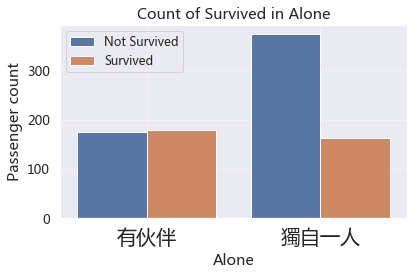

In [73]:
print(data[['Alone', 'Survived']].groupby('Alone', as_index=False).mean().sort_values(by='Survived', ascending=False))
sns.countplot(x='Alone', hue='Survived', data=data)
    
plt.title('Count of Survived in {}'.format('Alone'), size=15)
plt.xlabel('Alone', fontsize=15)
plt.ylabel('Passenger count', fontsize=15)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=13)
plt.grid(linestyle=':')
plt.legend(['Not Survived', 'Survived'],prop={'size':12})
plt.tight_layout()
plt.show()

### 有同伴的群組有一半的生存率，遠比獨自一人的群組還要高。

## 做卡方，以95%信賴區間做假設檢定，H0 是否有同伴對是否生存沒有顯著差異。

In [74]:
Alone0_no_survived = data.loc[(data["Alone"]=="有伙伴")&(data["Survived"]==0),"Survived"].dropna().count()
Alone0_survived = data.loc[(data["Alone"]=="有伙伴")&(data["Survived"]==1),"Survived"].dropna().count()
Alone1_no_survived = data.loc[(data["Alone"]=="獨自一人")&(data["Survived"]==0),"Survived"].dropna().count()
Alone1_survived = data.loc[(data["Alone"]=="獨自一人")&(data["Survived"]==1),"Survived"].dropna().count()


Alone_no_survived = [Alone0_no_survived,Alone1_no_survived,]
Alone_survived = [Alone0_survived,Alone1_survived]

Alone_data =  np.array([Alone_no_survived, Alone_survived ])
p_value = stats.chi2_contingency(Alone_data)[1]
print("p-value:",p_value)

p-value: 1.9726543846517183e-09


### 結果: p值 < 0.05，拒絕Ho，是否有同伴對是否生存有顯著差異，列為特徵。

In [75]:
data['Alone'] = LabelEncoder().fit_transform(data["Alone"])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck,Family,Family_st,Alone
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,D3,1,2,0
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Mrs,1,D1,1,2,0
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss,1,D3,0,3,1
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Mrs,1,D1,1,2,0
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,D3,0,3,1


## Title 分類並轉碼

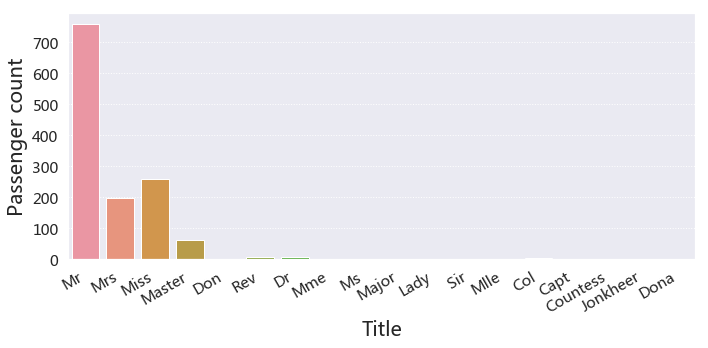

In [76]:
plt.figure('Survived', figsize=(10,5))
sns.countplot(x='Title', data=data)
plt.xlabel('Title',fontsize=20)
plt.ylabel('Passenger count', fontsize=20)
plt.tick_params(labelsize=15)
plt.grid(axis='y',linestyle=':')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()

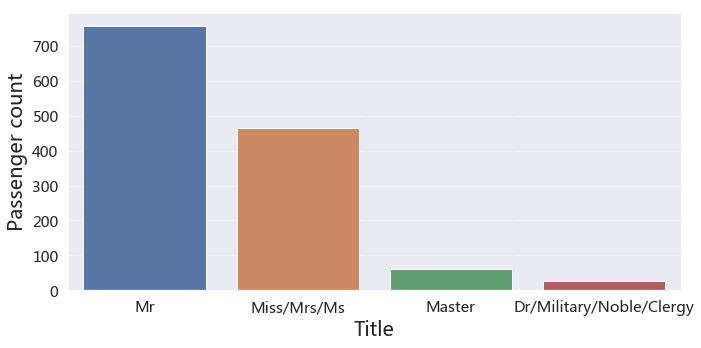

In [77]:
# 女士
data['Title'] = data['Title'].replace(['Mrs', 'Miss', 'Ms', 'Mlle','Lady','Mme', 'Countess','Dona'], 'Miss/Mrs/Ms')
#特殊人員
data['Title'] = data['Title'].replace(['Don','Rev', 'Dr','Major','Sir','Col','Capt','Jonkheer'], 'Dr/Military/Noble/Clergy')

plt.figure('Survived', figsize=(10,5))
sns.countplot(x='Title', data=data)
plt.xlabel('Title',fontsize=20)
plt.ylabel('Passenger count', fontsize=20)
plt.tick_params(labelsize=15)
plt.grid(axis='y',linestyle=':')
plt.tight_layout()
plt.show()

                      Title  Survived
2               Miss/Mrs/Ms  0.741214
1                    Master  0.575000
0  Dr/Military/Noble/Clergy  0.285714
3                        Mr  0.156673


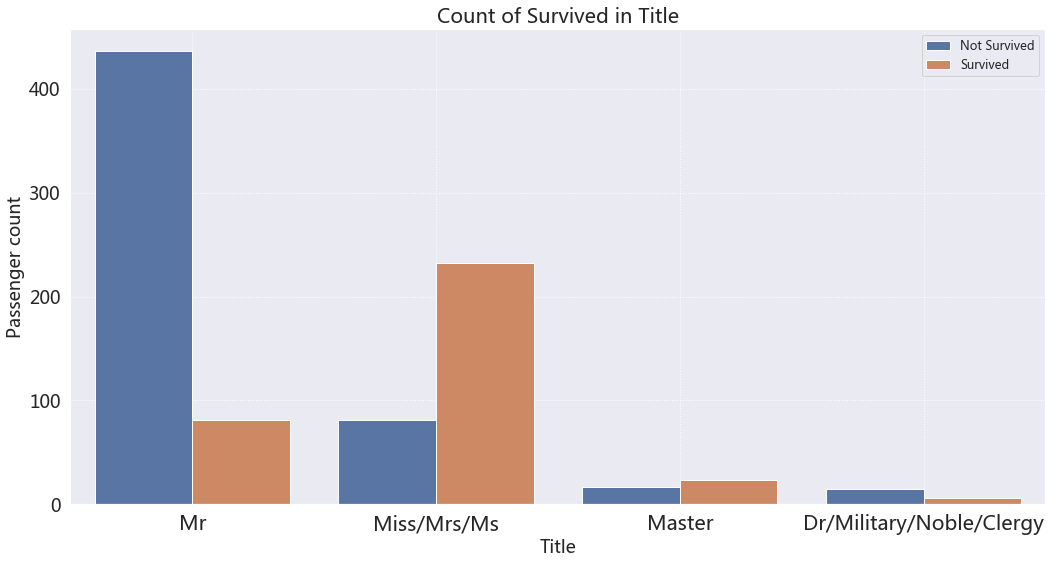

In [78]:
print(data[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived', ascending=False))
plt.figure(figsize=(15,8))
sns.countplot(x='Title', hue='Survived', data=data)
    
plt.title('Count of Survived in Title', size=20)
plt.xlabel('Title', fontsize=18)
plt.ylabel('Passenger count', fontsize=18)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=18)
plt.grid(linestyle=':')
plt.legend(['Not Survived', 'Survived'], loc='upper right',prop={'size':12})
plt.tight_layout()
plt.show()

### Miss/Mrs/Ms組為女士，生存率最高，其次為Master，與船長宣言相呼應，女人與小孩先走。

In [79]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck,Family,Family_st,Alone
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,Mr,1,D3,1,2,0
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,Miss/Mrs/Ms,1,D1,1,2,0
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,Miss/Mrs/Ms,1,D3,0,3,1
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,Miss/Mrs/Ms,1,D1,1,2,0
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,Mr,1,D3,0,3,1


## 做卡方檢定，以95%信賴區間做假設檢定，H0 不同稱謂對是否生存沒有顯著差異。

In [80]:
TitleMr_no_survived = data.loc[(data["Title"]=="Mr")&(data["Survived"]==0),"Survived"].dropna().count()
TitleMr_survived = data.loc[(data["Title"]=="Mr")&(data["Survived"]==1),"Survived"].dropna().count()
TitleMs_no_survived = data.loc[(data["Title"]=="Miss/Mrs/Ms")&(data["Survived"]==0),"Survived"].dropna().count()
TitleMs_survived = data.loc[(data["Title"]=="Miss/Mrs/Ms")&(data["Survived"]==1),"Survived"].dropna().count()
TitleMaster_no_survived = data.loc[(data["Title"]=="Master")&(data["Survived"]==0),"Survived"].dropna().count()
TitleMaster_survived = data.loc[(data["Title"]=="Master")&(data["Survived"]==1),"Survived"].dropna().count()

TitleSpecial_no_survived = data.loc[(data["Title"]=="Dr/Military/Noble/Clergy")&(data["Survived"]==0),"Survived"].dropna().count()
TitleSpecial_survived = data.loc[(data["Title"]=="Dr/Military/Noble/Clergy")&(data["Survived"]==1),"Survived"].dropna().count()


TitleGroup_no_survived = [TitleMr_no_survived,TitleMs_no_survived,TitleMaster_no_survived,TitleSpecial_no_survived]
TitleGroup_survived = [TitleMr_survived,TitleMs_survived,TitleMaster_survived,TitleSpecial_survived]

TitleGroup_data =  np.array([TitleGroup_no_survived, TitleGroup_survived ])
p_value = stats.chi2_contingency(TitleGroup_data)[1]
print("p-value:",p_value)

p-value: 2.554305445358215e-62


### 結果: p值< 0.05，拒絕H0，不同稱謂對是否生存有顯著差異。

In [81]:
data['Title'] = LabelEncoder().fit_transform(data["Title"])
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsChild,Deck,Family,Family_st,Alone
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,3,1,D3,1,2,0
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,2,1,D1,1,2,0
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,2,1,D3,0,3,1
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,2,1,D1,1,2,0
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,3,1,D3,0,3,1


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int32  
 1   Cabin        1309 non-null   int32  
 2   Embarked     1309 non-null   int32  
 3   Fare         1309 non-null   int32  
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   int32  
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
 12  Title        1309 non-null   int32  
 13  IsChild      1309 non-null   int64  
 14  Deck         1309 non-null   object 
 15  Family       1309 non-null   int64  
 16  Family_st    1309 non-null   int32  
 17  Alone        1309 non-null   int32  
dtypes: float64(1), int32(8), int64(6), object(3)
mem

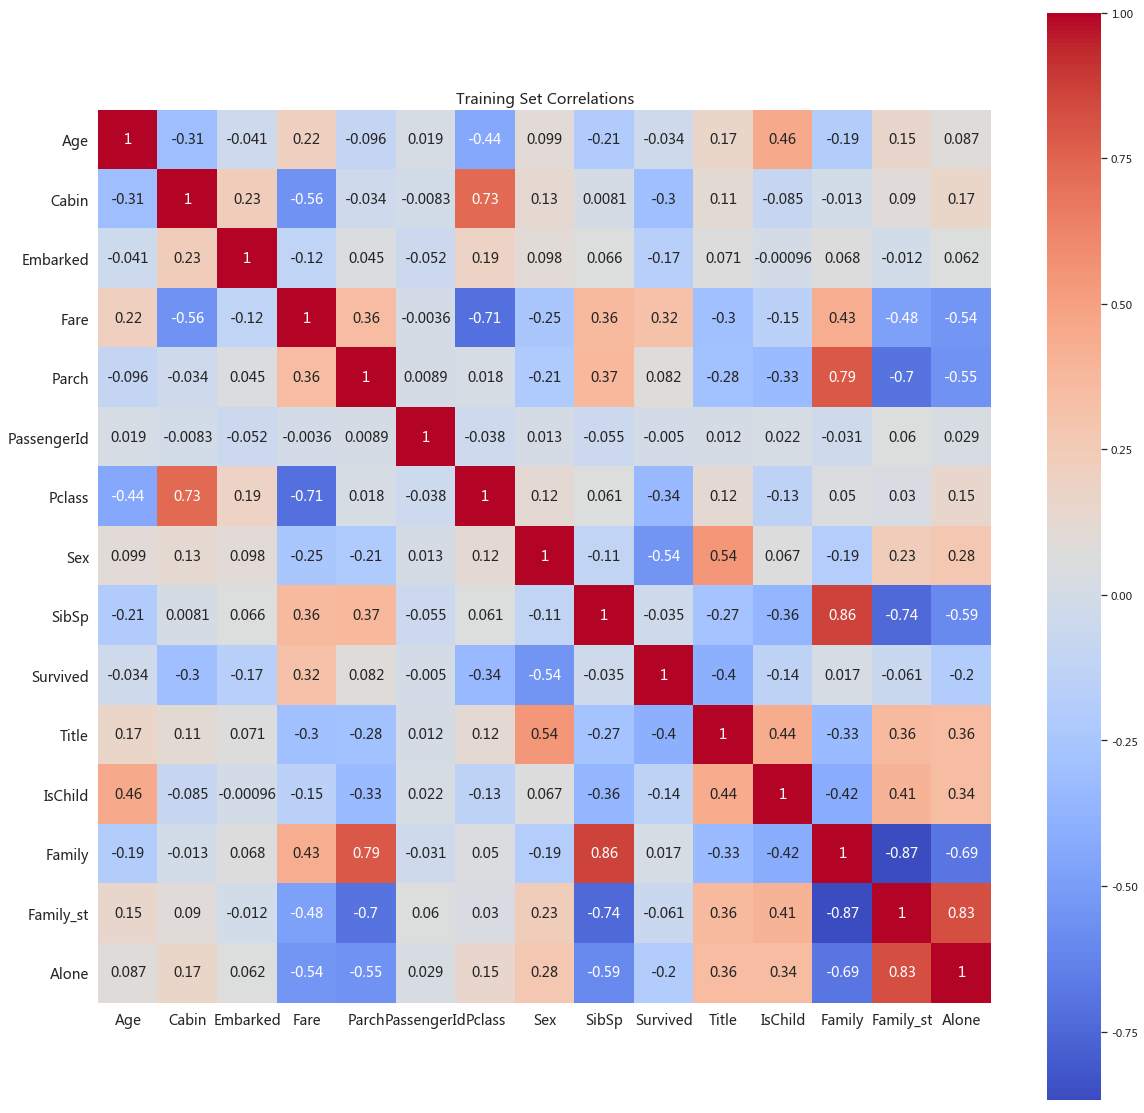

In [83]:
plt.figure(figsize=(20, 20))

sns.heatmap(data.corr(), annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})
plt.title('Training Set Correlations', size=15)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
    
plt.show()

### 是否生存對 Family、Age、Embarked、Parch、SibSp、Family_st、IsChild 相關性較低，可以注意這幾個特徵。

# 獨熱編碼

In [84]:
cols = ['Embarked', "Sex",'Pclass',"Family_st",'Deck','Title', 'IsChild', "Alone"]
# cols = ['Embarked', "Sex",'Pclass',"Family_st", 'Deck','Title',"Alone"]
for feature in cols:
    onehot_title = onehot(feature, data)
    data = pd.concat([data, *onehot_title], axis=1)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
0,2,8,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,6,2,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,8,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,2,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,5,8,2,3,"Allen, Mr. William Henry",0,5,3,1,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [85]:
drop_cols = ['Embarked', "Sex",'Pclass',"Family_st", "Alone", 'Deck','Title', 'IsChild']
data.drop(columns=drop_cols, inplace=True)

In [86]:
data.shape

(1309, 33)

## 刪除用不到的 feature

In [87]:
data.drop(columns='Name', inplace=True)

In [88]:
data.drop(columns='Ticket', inplace=True)

In [89]:
data.drop(columns='Family', inplace=True) 

In [90]:
data.drop(columns='Parch', inplace=True) 

In [91]:
data.drop(columns='SibSp', inplace=True)

In [92]:
data.head()

,Age,Cabin,Fare,PassengerId,Survived,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
0,2,8,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,6,2,11,2,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,8,3,3,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,2,10,4,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,5,8,3,5,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## 拆分訓練集，測試集

In [93]:
train = data.loc[data['Survived'].notnull()]
test = data.loc[~data['Survived'].notnull()]

In [94]:
print(train.shape,test.shape)

(891, 28) (418, 28)


In [95]:
train.head()

,Age,Cabin,Fare,PassengerId,Survived,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
0,2,8,0,1,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,6,2,11,2,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,8,3,3,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,2,10,4,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,5,8,3,5,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [96]:
test.head()

,Age,Cabin,Fare,PassengerId,Survived,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
891,5,8,2,892,NaN,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
892,7,8,0,893,NaN,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
893,7,8,4,894,NaN,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
894,4,8,4,895,NaN,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
895,2,8,5,896,NaN,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## train Survived -> int，delete id

In [97]:
train['Survived'] = train['Survived'].astype('int')
train.drop(columns='PassengerId', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
train.head()

,Age,Cabin,Fare,Survived,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,Pclass_1,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
0,2,8,0,0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,6,2,11,1,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,3,8,3,1,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,5,2,10,1,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,5,8,3,0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## save id，delete id , survived

In [99]:
passengerid = test['PassengerId']

In [100]:
test.drop(columns=['PassengerId', 'Survived'], inplace=True)
test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Age,Cabin,Fare,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,Pclass_1,Pclass_2,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
891,5,8,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
892,7,8,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
893,7,8,4,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
894,4,8,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
895,2,8,5,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


 # 訓練集 分割成 訓練集(輸出)， 驗證集(輸入)，進一步確認模型準確率

In [101]:
train_in = train.drop(columns='Survived')
train_out = train['Survived']

In [102]:
print(train_in.shape)
print(train_out.shape)

(891, 26)
(891,)


In [103]:
train_x, test_x, train_y, test_y = \
    train_test_split(train_in, train_out, test_size=0.2, random_state=10)

In [104]:
train_x.head()

,Age,Cabin,Fare,Embarked_1,Embarked_2,Embarked_3,Sex_1,Sex_2,Pclass_1,Pclass_2,...,Deck_2,Deck_3,Title_1,Title_2,Title_3,Title_4,IsChild_1,IsChild_2,Alone_1,Alone_2
57,4,8,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
717,4,4,4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
431,5,8,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
633,6,8,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
163,0,8,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [105]:
train.columns

Index(['Age', 'Cabin', 'Fare', 'Survived', 'Embarked_1', 'Embarked_2',
       'Embarked_3', 'Sex_1', 'Sex_2', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Family_st_1', 'Family_st_2', 'Family_st_3', 'Family_st_4', 'Deck_1',
       'Deck_2', 'Deck_3', 'Title_1', 'Title_2', 'Title_3', 'Title_4',
       'IsChild_1', 'IsChild_2', 'Alone_1', 'Alone_2'],
      dtype='object')

In [106]:
# p維度(幾個特徵)，n樣本總個數，找出最小mic(選取最小的)
def aic_model(train_out, pred_train_y, p, n):
    resid = train_out - pred_train_y
    sse = sum(resid**2)
    return 2*p+n*np.log(sse/n) #np.log(n)*p+n*np.log(sse/n)

# #很接近的話 ，找出前幾個模型
# def choice(aic_min, aic):
#     np.exp((aic_min-aic)/2)

# 建立隨機森林模型 並確認準確率

In [107]:
#超參數組合
# params = [{'max_depth':[5,10,15,20,25], 'n_estimators':[100, 150, 200], 
#            'min_samples_split':[4, 5, 6, 7], 'min_samples_leaf':[4, 5, 6] }]
params = [{'max_depth':[5,10], 'n_estimators':[100, 150, 200], 
           'min_samples_split':[4, 5, 6], 'min_samples_leaf':[4, 5] }]
model2 = GridSearchCV(se.RandomForestClassifier(random_state=5), params, cv=6)


# 交叉驗證 精確度
# ac = ms.cross_val_score(model2, train_x, train_y, cv=5, scoring='accuracy')
# print('ac=',ac.mean()) 

# fw = ms.cross_val_score(model2, train_x, train_y, cv=5, scoring='f1_weighted')
# print('f1-weighted=',fw.mean()) 

# ac= 0.8257953314291342
# f1-weighted= 0.8222287944426107

model2.fit(train_x, train_y)

pred_train_y = model2.predict(train_x)
pred_test_y = model2.predict(test_x)
print('train_accuracy:',accuracy_score(train_y,pred_train_y))
print('test_accuracy:', accuracy_score(test_y, pred_test_y))
print(model2.best_params_)
print('aic:',aic_model(train_y, pred_train_y, 25, 712))

# train_accuracy: 0.8553370786516854
# test_accuracy: 0.8659217877094972
# {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
# aic: -1326.544433305826


# # n_estimators 超參數尋優
# n_estimators = np.arange(5,550, 50)
# train_scores, test_scores = ms.validation_curve(model2, train_x, train_y, 'n_estimators',n_estimators ,cv=6)
# train_mean1 = train_scores.mean(axis=1)
# for param, score in zip(n_estimators, train_mean1):
#     print(param, '->', score)

# # max_depth 超參數尋優
# max_depth = np.arange(1,25)
# train_scores, test_scores = ms.validation_curve(model2, train_x, train_y, 'max_depth', max_depth ,cv=6)
# train_mean2 = train_scores.mean(axis=1)
# for param, score in zip(max_depth, train_mean2):
#     print(param, '->', score)

train_accuracy: 0.8553370786516854
test_accuracy: 0.8659217877094972
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
aic: -1326.544433305826


# 建立SVC模型 並確認準確率

In [108]:
# import sklearn.model_selection as ms
# model1 = SVC()

# # 交叉驗證 精確度
# ac = ms.cross_val_score(model1, train_x, train_y, cv=5, scoring='accuracy')
# print('ac=',ac.mean()) 
# fw = ms.cross_val_score(model1, train_x, train_y, cv=5, scoring='f1_weighted')
# print('f1-weighted=',fw.mean()) 

# # ac= 0.7444105190584064
# # f1-weighted= 0.7442211154447733

# model1.fit(train_x, train_y)
# pred_train_y = model1.predict(train_x)
# pred_test_y = model1.predict(test_x)
# print('train_accuracy:',accuracy_score(train_y,pred_train_y))
# print('test_accuracy:', accuracy_score(test_y, pred_test_y))

# # train_accuracy: 0.8567415730337079
# # test_accuracy: 0.7932960893854749http://localhost:8891/notebooks/best.ipynb#

In [109]:
train_x.shape

(712, 26)

## 邏輯式回歸模型

In [110]:
# import sklearn.linear_model as lm
# model3 = lm.LogisticRegression(solver='liblinear', C=1)

# # # 交叉驗證 精確度
# # ac = ms.cross_val_score(model3, train_x, train_y, cv=5, scoring='accuracy')
# # print('ac=',ac.mean())
# # fw = ms.cross_val_score(model3, train_x, train_y, cv=5, scoring='f1_weighted')
# # print('f1-weighted=',fw.mean()) 

# # ac= 0.7948685117699202
# # f1-weighted= 0.7935533536535117

# model3.fit(train_x, train_y)

# pred_train_y = model3.predict(train_x)
# pred_test_y = model3.predict(test_x)
# print('train_accuracy:',accuracy_score(train_y,pred_train_y))
# print('test_accuracy:', accuracy_score(test_y, pred_test_y))

# print('aic:',aic_model(train_y, pred_train_y, 20, 712))

# # train_accuracy: 0.8160112359550562
# # test_accuracy: 0.8379888268156425
# # aic: -1165.330978806107

## 梯度上升樹

In [111]:
# import sklearn.linear_model as lm

# #超參數組合 learning_rate學習率
# params = [{'max_depth':[5,10,15,20,25,30], 'n_estimators':[100, 150, 200, 250]}]

# model4= GridSearchCV(se.GradientBoostingClassifier(random_state=5), params, cv=6)

# # # 交叉驗證 精確度
# # ac = ms.cross_val_score(model4, train_x, train_y, cv=5, scoring='accuracy')
# # print('ac=',ac.mean()) 

# # fw = ms.cross_val_score(model4, train_x, train_y, cv=5, scoring='f1_weighted')
# # print('f1-weighted=',fw.mean()) 

# # ac= 0.8034705407586763
# # f1-weighted= 0.8027014972848301

# model4.fit(train_x, train_y)

# pred_train_y = model4.predict(train_x)
# pred_test_y = model4.predict(test_x)
# print('train_accuracy:',accuracy_score(train_y,pred_train_y))
# print('test_accuracy:', accuracy_score(test_y, pred_test_y))
# print(model4.best_params_)
# print('aic:',aic_model(train_y, pred_train_y, 25, 712))
# # train_accuracy: 0.9775280898876404
# # test_accuracy: 0.8379888268156425
# # {'max_depth': 5, 'n_estimators': 150}
# # aic: -2652.388302690603

## 貝氏分類器

In [112]:
# import sklearn.naive_bayes as nb
# model5 = nb.GaussianNB()
# model5.fit(train_x, train_y)

# #交叉驗證
# ac = ms.cross_val_score(model5, train_x, train_y, cv=5, scoring='accuracy')
# print('ac=', ac.mean())
# fw = ms.cross_val_score(model5, train_x, train_y, cv=5, scoring='f1_weighted')
# print('f1-weighted=', fw.mean())

# # ac= 0.750004924652812
# # f1-weighted= 0.7524614549684925

# pred_train_y = model5.predict(train_x)
# pred_test_y = model5.predict(test_x)
# print('train_accuracy:',accuracy_score(train_y,pred_train_y))
# print('test_accuracy:', accuracy_score(test_y, pred_test_y))

# print('aic:',aic_model(train_y, pred_train_y, 20, 712))

# # train_accuracy: 0.7528089887640449
# # test_accuracy: 0.8212290502793296
# # aic: -955.0868684581627

## 正向激勵(失敗)

In [113]:
# model6 = se.AdaBoostRegressor(st.DecisionTreeRegressor(max_depth=4), n_estimators=200, random_state=5)
# model6.fit(train_x, train_y)

# #交叉驗證
# ac = ms.cross_val_score(model6, train_x, train_y, cv=5, scoring='accuracy')
# print('ac=', ac.mean())
# fw = ms.cross_val_score(model6, train_x, train_y, cv=5, scoring='f1_weighted')
# print('f1-weighted=', fw.mean())


# pred_train_y = model6.predict(train_x)
# pred_test_y = model6.predict(test_x)
# print('train_accuracy:',accuracy_score(train_y,pred_train_y))
# print('test_accuracy:', accuracy_score(test_y, pred_test_y))

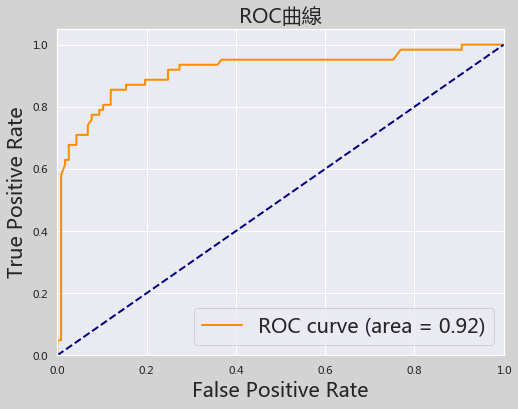

In [114]:
import numpy as np
from sklearn.metrics import roc_curve, auc

score_y = model2.predict_proba(test_x)
score_y2 = score_y [:,1]
fpr, tpr, _ = roc_curve(test_y,score_y2)
roc_auc = auc(fpr, tpr)
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6),facecolor="lightgray")
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC曲線', fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.legend(loc="lower right",prop={'size':20})
#fig.savefig('/tmp/roc.png')
plt.show()

## 特徵重要性

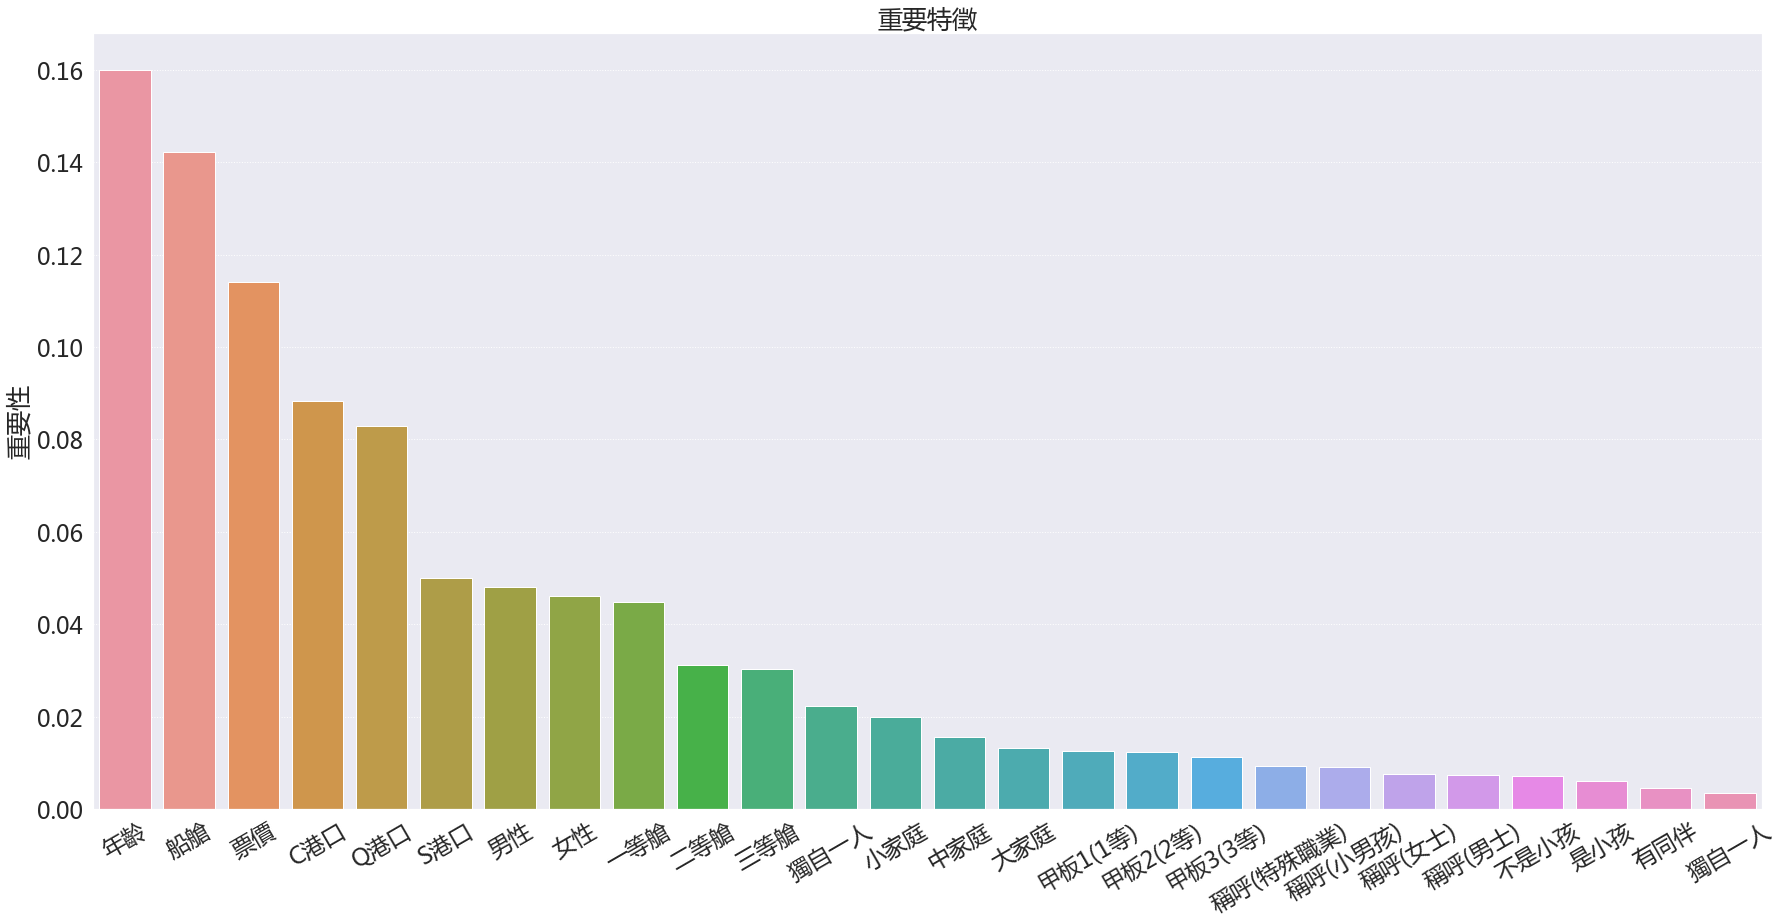

In [115]:
#獲取特徵名稱
feature_names = np.array(test.columns.values.tolist())
#特徵重要性
fi_rfc = model2.best_estimator_.feature_importances_
sorted_index = fi_rfc.argsort()[::-1]

name_dict = {"Sex":"性別","Sex_1":"男性","Sex_2":"女性","Fare":"票價","Age":"年齡","SibSp":"兄弟姊妹+配偶","Title_1":"稱呼(特殊職業)","Title_2":"稱呼(小男孩)",
             "Title_3":"稱呼(女士)","Title_4":"稱呼(男士)","Pclass_1":"一等艙","Pclass_2":"二等艙","Pclass_3":"三等艙","Alone_1":"有同伴",
             "Alone_2":"獨自一人","Alone":"有無同伴","Deck_1":"甲板1(1等)","Deck_2":"甲板2(2等)","Deck_3":"甲板3(3等)","Cabin":"船艙",
            "Embarked_1":"C港口","Embarked_2":"Q港口","Embarked_3":"S港口","IsChild":"是否小孩","IsChild_1":"不是小孩","IsChild_2":"是小孩",
            "Family_st_1":"獨自一人","Family_st_2":"小家庭","Family_st_3":"中家庭","Family_st_4":"大家庭"}
feature_names =  [name_dict[i] for i in feature_names]

plt.figure(figsize=(25,13))
plt.title('重要特徵', fontsize=25)
sorted_index = fi_rfc.argsort()[::-1]

pos = np.arange(sorted_index.size)
sns.barplot(pos, fi_rfc[sorted_index])

plt.ylabel('重要性', fontsize=25)
plt.tick_params(labelsize=23)
plt.grid(axis='y', linestyle=':')
plt.xticks(pos, feature_names, rotation=30)
plt.tight_layout()


# 提交

In [116]:
model2

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=5,
                                   

In [117]:
pre = model2.predict(test)

In [118]:
pre[:5]

array([0, 0, 0, 0, 1])

In [119]:
final = pd.DataFrame()
final['PassengerId'] = passengerid
final['Survived'] = pre

In [120]:
final.head(10)

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [121]:
final.to_csv('submit.csv',index = None)